In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [5]:
xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

%xmode minimal
%matplotlib inline
%config InlineBackend.figure_format="retina"

Exception reporting mode: Minimal


In [11]:
# xarray.tutorial.load_dataset is a convenience function to download and open DataSets 
# by name (listed at that link).
# https://docs.xarray.dev/en/stable/generated/xarray.tutorial.open_dataset.html#xarray.tutorial.open_dataset


# Available datasets:
# - "air_temperature": NCEP reanalysis subset
# - "air_temperature_gradient": NCEP reanalysis subset with approximate x,y gradients
# - "basin_mask": Dataset with ocean basins marked using integers
# - "ASE_ice_velocity": MEaSUREs InSAR-Based Ice Velocity of the Amundsen Sea Embayment, Antarctica, Version 1
# - "rasm": Output of the Regional Arctic System Model (RASM)
# - "ROMS_example": Regional Ocean Model System (ROMS) output
# - "tiny": small synthetic dataset with a 1D data variable
# - "era5-2mt-2019-03-uk.grib": ERA5 temperature data over the UK
# - "eraint_uvz": data from ERA-Interim reanalysis, monthly averages of upper level data
# - "ersstv5": NOAA’s Extended Reconstructed Sea Surface Temperature monthly averages

ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [14]:
# Datasets are dictionary-like containers of “DataArray”s. 
ds['air']

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [17]:
da = ds.air
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [22]:
da.dims

('time', 'lat', 'lon')

In [23]:
da.coords

Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00

In [24]:
da.lon

<xarray.DataArray 'lon' (lon: 53)> Size: 212B
200.0 202.5 205.0 207.5 210.0 212.5 ... 317.5 320.0 322.5 325.0 327.5 330.0
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [25]:
da.coords["lon"]

<xarray.DataArray 'lon' (lon: 53)> Size: 212B
200.0 202.5 205.0 207.5 210.0 212.5 ... 317.5 320.0 322.5 325.0 327.5 330.0
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [26]:
da.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [27]:
# assign your own attributes!
da.attrs["who_is_awesome"] = "xarray"
da.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'who_is_awesome': 'xarray'}

In [28]:
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [30]:
# .data contains the numpy array storing air temperature values.
da.data

array([[[241.2 , 242.5 , ..., 235.5 , 238.6 ],
        [243.8 , 244.5 , ..., 235.3 , 239.3 ],
        ...,
        [295.9 , 296.2 , ..., 295.9 , 295.2 ],
        [296.29, 296.79, ..., 296.79, 296.6 ]],

       [[242.1 , 242.7 , ..., 233.6 , 235.8 ],
        [243.6 , 244.1 , ..., 232.5 , 235.7 ],
        ...,
        [296.2 , 296.7 , ..., 295.5 , 295.1 ],
        [296.29, 297.2 , ..., 296.4 , 296.6 ]],

       ...,

       [[245.79, 244.79, ..., 243.99, 244.79],
        [249.89, 249.29, ..., 242.49, 244.29],
        ...,
        [296.29, 297.19, ..., 295.09, 294.39],
        [297.79, 298.39, ..., 295.49, 295.19]],

       [[245.09, 244.29, ..., 241.49, 241.79],
        [249.89, 249.29, ..., 240.29, 241.69],
        ...,
        [296.09, 296.89, ..., 295.69, 295.19],
        [297.69, 298.09, ..., 296.19, 295.69]]])

In [31]:
type(da.data)

numpy.ndarray

Xarray provides two main data structures:
- DataArrays that wrap underlying data containers (e.g. numpy arrays) and contain associated metadata
- Datasets that are dictionary-like containers of DataArrays

DataArrays contain underlying arrays and associated metadata:
- Name
- Dimension names
- Coordinate variables
- and arbitrary attributes.

In [32]:
lat = ds.air.lat.data
lon = ds.air.lon.data
temp = ds.air.data

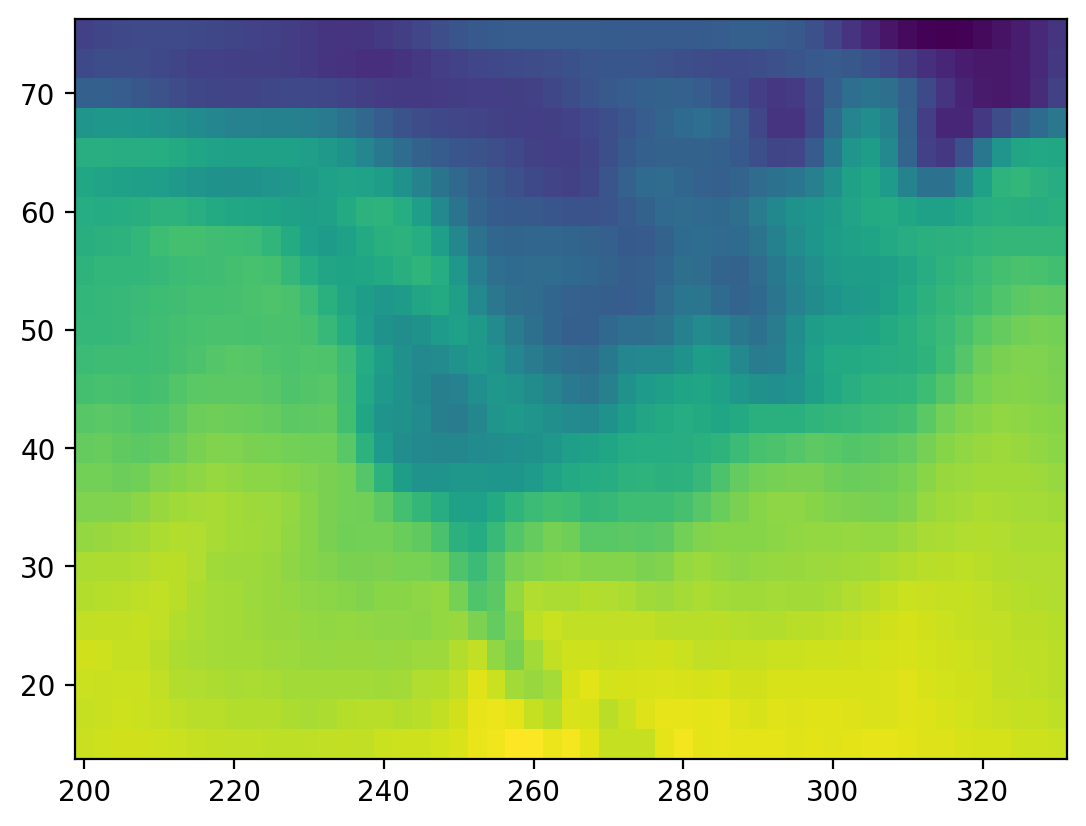

In [33]:
plt.figure()
plt.pcolormesh(lon, lat, temp[0,:,:])

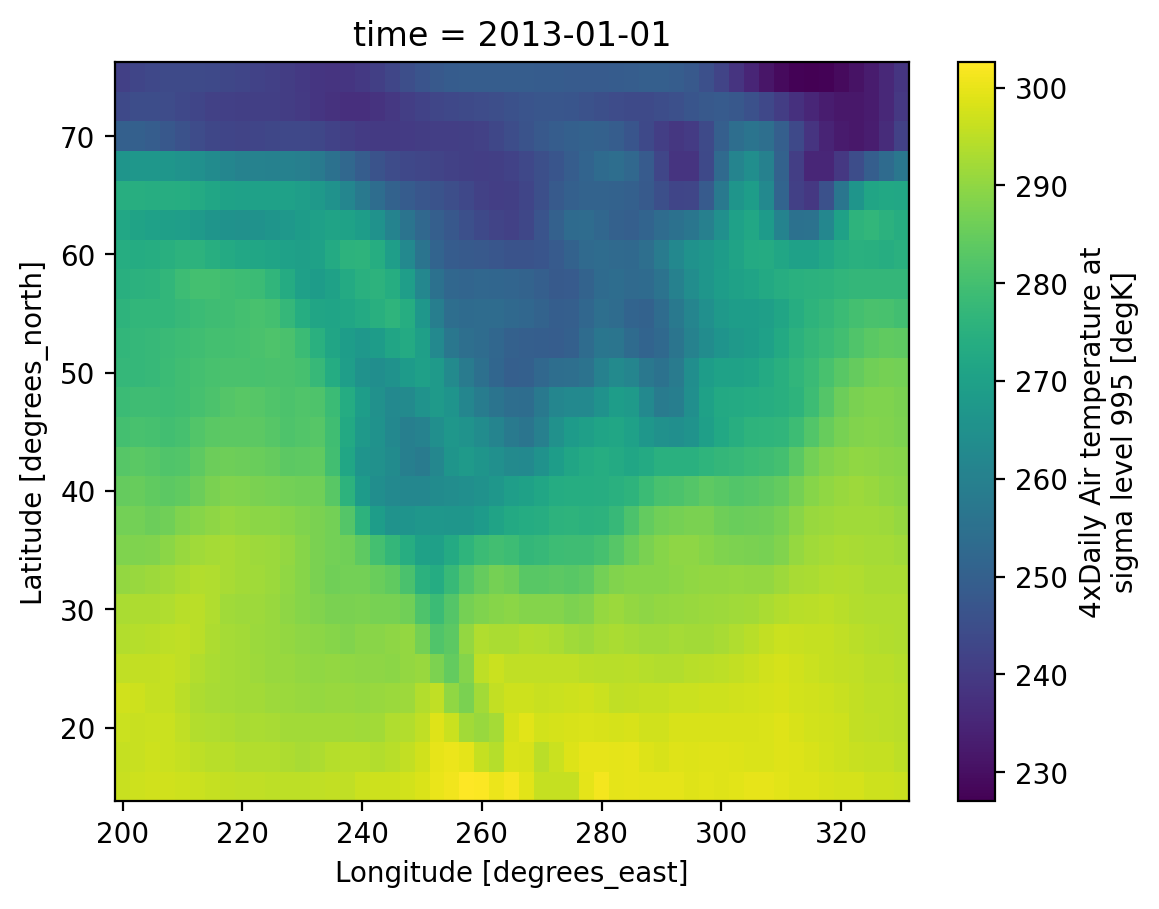

In [34]:
ds.air.isel(time=0).plot(x='lon')

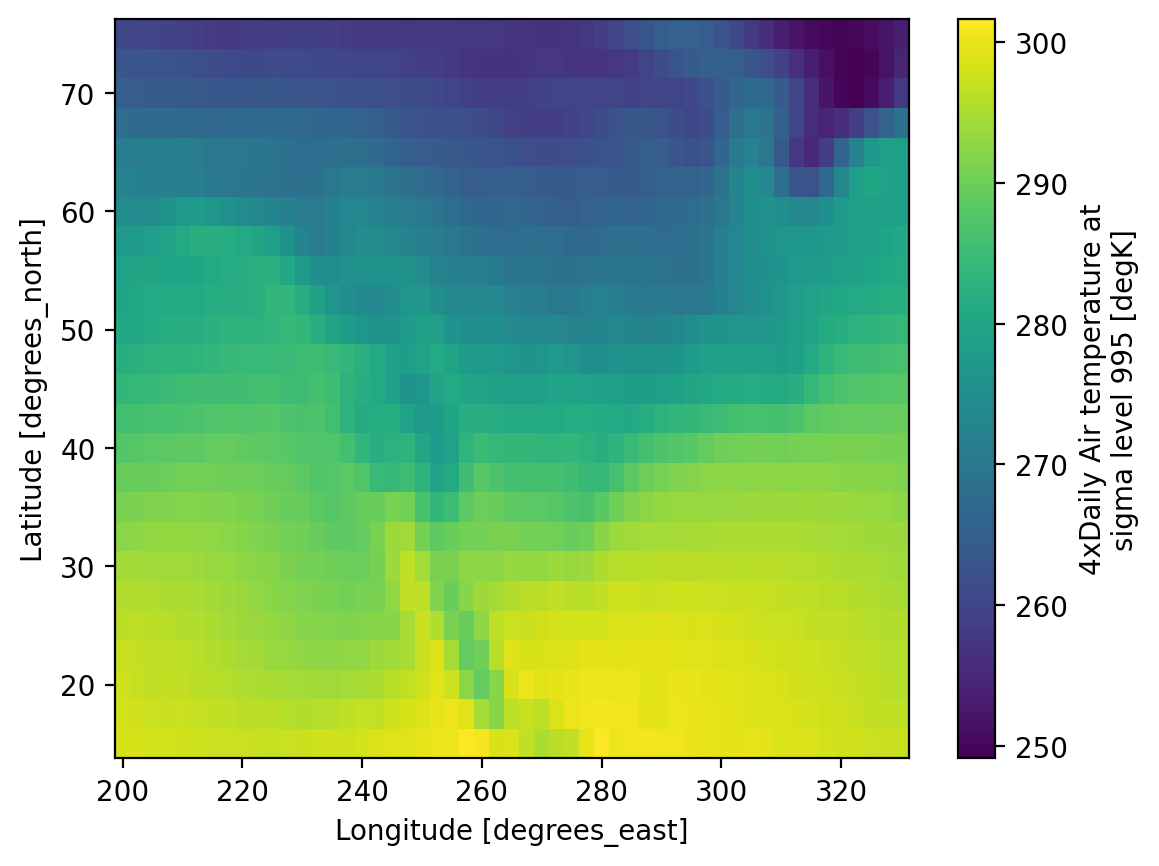

In [35]:
ds.air.mean(dim="time").plot(x="lon")

In [ ]:
# Xarray supports
# - label-based indexing using .sel
# - position-based indexing using .isel

In [36]:
# pull out data for all of 2013-May
ds.sel(time="2013-05")

<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 25, time: 124, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 992B 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 1MB 259.2 259.3 259.1 ... 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [37]:
# demonstrate slicing
ds.sel(time=slice("2013-05", "2013-07"))

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 25, time: 368, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 3kB 2013-05-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 4MB 259.2 259.3 259.1 ... 299.5 299.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [38]:
ds.sel(time="2013")

<xarray.Dataset> Size: 15MB
Dimensions:  (lat: 25, time: 1460, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 12kB 2013-01-01 ... 2013-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 15MB 241.2 242.5 243.5 ... 295.1 294.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [39]:
# demonstrate "nearest" indexing
ds.sel(lon=240.2, method="nearest")

<xarray.Dataset> Size: 607kB
Dimensions:  (lat: 25, time: 2920)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
    lon      float32 4B 240.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat) float64 584kB 239.6 237.2 240.1 ... 294.8 296.9 298.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [40]:
# "nearest" indexing at multiple points
ds.sel(lon=[240.125, 234], lat=[40.3, 50.3], method="nearest")

<xarray.Dataset> Size: 117kB
Dimensions:  (lat: 2, time: 2920, lon: 2)
Coordinates:
  * lat      (lat) float32 8B 40.0 50.0
  * lon      (lon) float32 8B 240.0 235.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 93kB 268.1 283.0 265.5 ... 256.8 268.6
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [41]:
# pull out time index 0, lat index 2, and lon index 3
ds.air.isel(time=0, lat=2, lon=3)

<xarray.DataArray 'air' ()> Size: 8B
247.5
Coordinates:
    lat      float32 4B 70.0
    lon      float32 4B 207.5
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [47]:
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [48]:
ds.air.isel(lat=slice(10))

<xarray.DataArray 'air' (time: 2920, lat: 10, lon: 53)> Size: 12MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 273.4 273.8 273.5 273.8 275.0 276.2
Coordinates:
  * lat      (lat) float32 40B 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [ ]:
# Consider calculating the mean air temperature per unit surface area for this dataset. 

# Because latitude and longitude correspond to spherical(adj.球形的，球状的；) coordinates 
# for Earth’s surface, each 2.5x2.5 degree grid cell actually has a different surface 
# area as you move away from the equator(n.赤道)! This is because latitudinal length is 
# fixed, but longitudinal length varies with latitude.

# https://en.wikipedia.org/wiki/Spherical_coordinate_system#Integration_and_differentiation_in_spherical_coordinates

In [51]:
# Earth's average radius in meters
R = 6.371e6

# Coordinate spacing for this dataset is 2.5 x 2.5 degrees
dϕ = np.deg2rad(2.5)
dλ = np.deg2rad(2.5)

dlat = R * dϕ * xr.ones_like(ds.air.lon)
dlon = R * dλ * np.cos(np.deg2rad(ds.air.lat))
dlon.name = "dlon"
dlat.name = "dlat"

In [52]:
np.cos(np.deg2rad(ds.lat))

<xarray.DataArray 'lat' (lat: 25)> Size: 100B
0.2588 0.3007 0.342 0.3827 0.4226 0.4617 ... 0.9063 0.9239 0.9397 0.9537 0.9659
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [53]:
dlat

<xarray.DataArray 'dlat' (lon: 53)> Size: 212B
2.78e+05 2.78e+05 2.78e+05 2.78e+05 ... 2.78e+05 2.78e+05 2.78e+05 2.78e+05
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [54]:
dlon

<xarray.DataArray 'dlon' (lat: 25)> Size: 100B
7.195e+04 8.359e+04 9.508e+04 1.064e+05 ... 2.612e+05 2.651e+05 2.685e+05
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [55]:
# Broadcasting: expanding data
cell_area = dlon * dlat
cell_area

<xarray.DataArray (lat: 25, lon: 53)> Size: 5kB
2e+10 2e+10 2e+10 2e+10 2e+10 ... 7.464e+10 7.464e+10 7.464e+10 7.464e+10
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

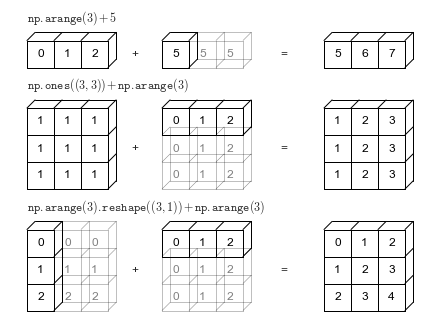

In [56]:
# Alignment: putting data on the same grid
ds.air.isel(time=1) / cell_area

<xarray.DataArray (lat: 25, lon: 53)> Size: 11kB
1.21e-08 1.213e-08 1.215e-08 1.217e-08 ... 3.971e-09 3.971e-09 3.974e-09
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-01T06:00:00
Attributes:
    long_name:       4xDaily Air temperature at sigma level 995
    units:           degK
    precision:       2
    GRIB_id:         11
    GRIB_name:       TMP
    var_desc:        Air temperature
    dataset:         NMC Reanalysis
    level_desc:      Surface
    statistic:       Individual Obs
    parent_stat:     Other
    actual_range:    [185.16 322.1 ]
    who_is_awesome:  xarray

In [58]:
# To make sure variables are aligned as you think they are, do the following:

xr.align(cell_area, ds.air, join="exact")

(<xarray.DataArray (lat: 25, lon: 53)> Size: 5kB
 2e+10 2e+10 2e+10 2e+10 2e+10 ... 7.464e+10 7.464e+10 7.464e+10 7.464e+10
 Coordinates:
   * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
   * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
 Attributes:
     standard_name:  latitude
     long_name:      Latitude
     units:          degrees_north
     axis:           Y,
 <xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
 241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
 Coordinates:
   * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
   * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
   * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
 Attributes:
     long_name:       4xDaily Air temperature at sigma level 995
     units:           degK
     precision:       2
     GRIB_id:         11
     GRIB_name:    

In [59]:
# High level computation

# - groupby
# - resample
# - rolling
# - coarsen
# - weighted

In [60]:
ds.groupby("time.season")

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [65]:
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset> Size: 43kB
Dimensions:  (season: 4, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air      (season, lat, lon) float64 42kB 247.0 247.0 246.7 ... 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [66]:
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [67]:
seasonal_mean = seasonal_mean.sel(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset> Size: 43kB
Dimensions:  (season: 4, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * season   (season) object 32B 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    air      (season, lat, lon) float64 42kB 247.0 247.0 246.7 ... 299.4 299.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

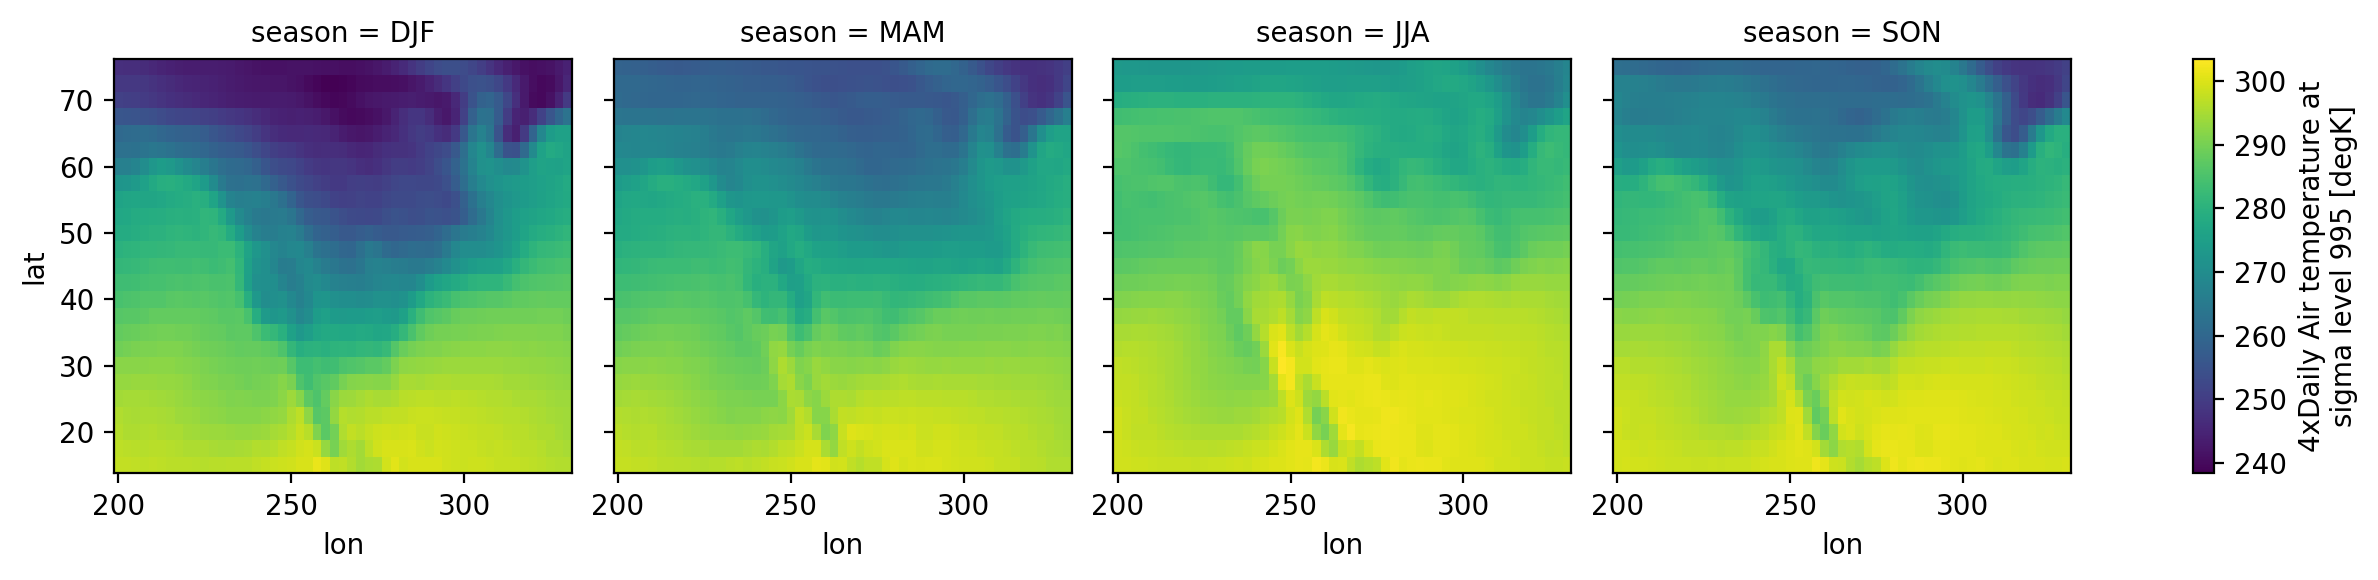

In [68]:
seasonal_mean.air.plot(col="season")

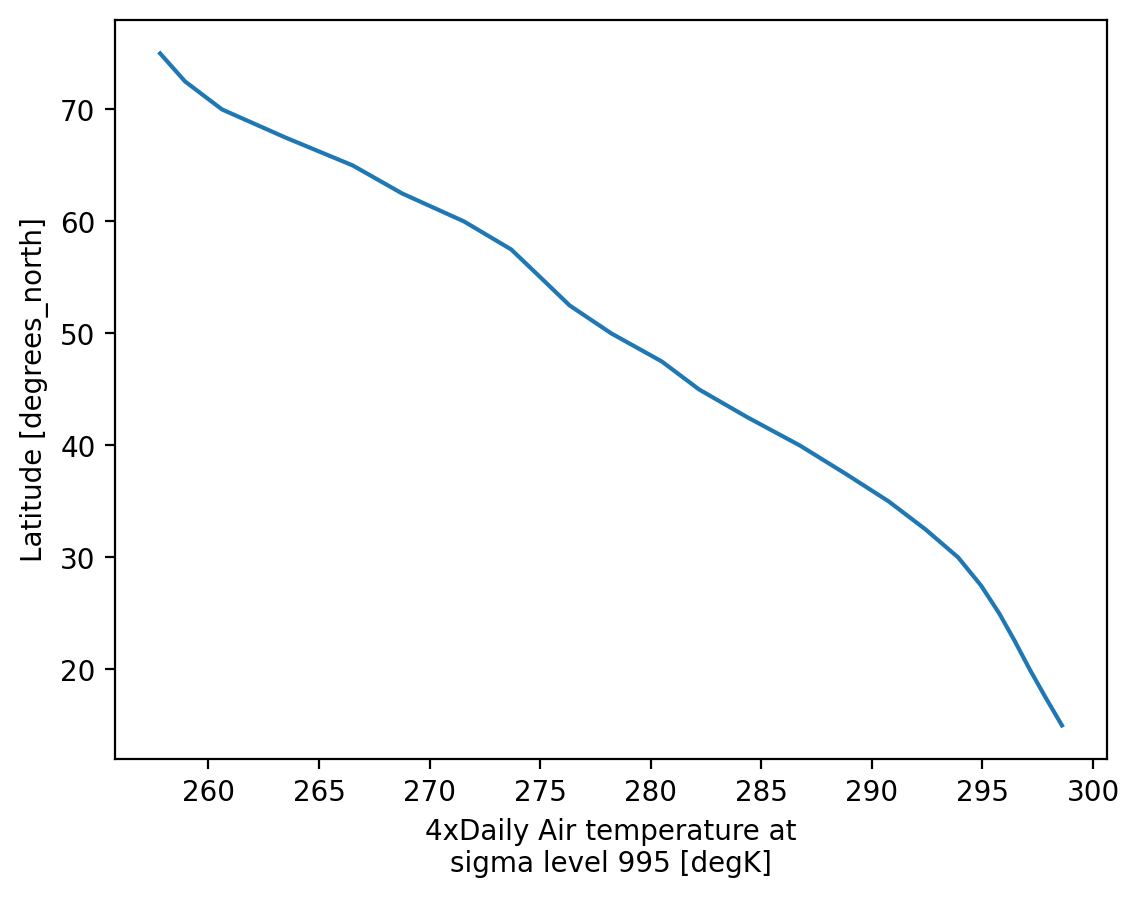

In [69]:
ds.weighted(cell_area).mean(["lon", "time"]).air.plot(y="lat")

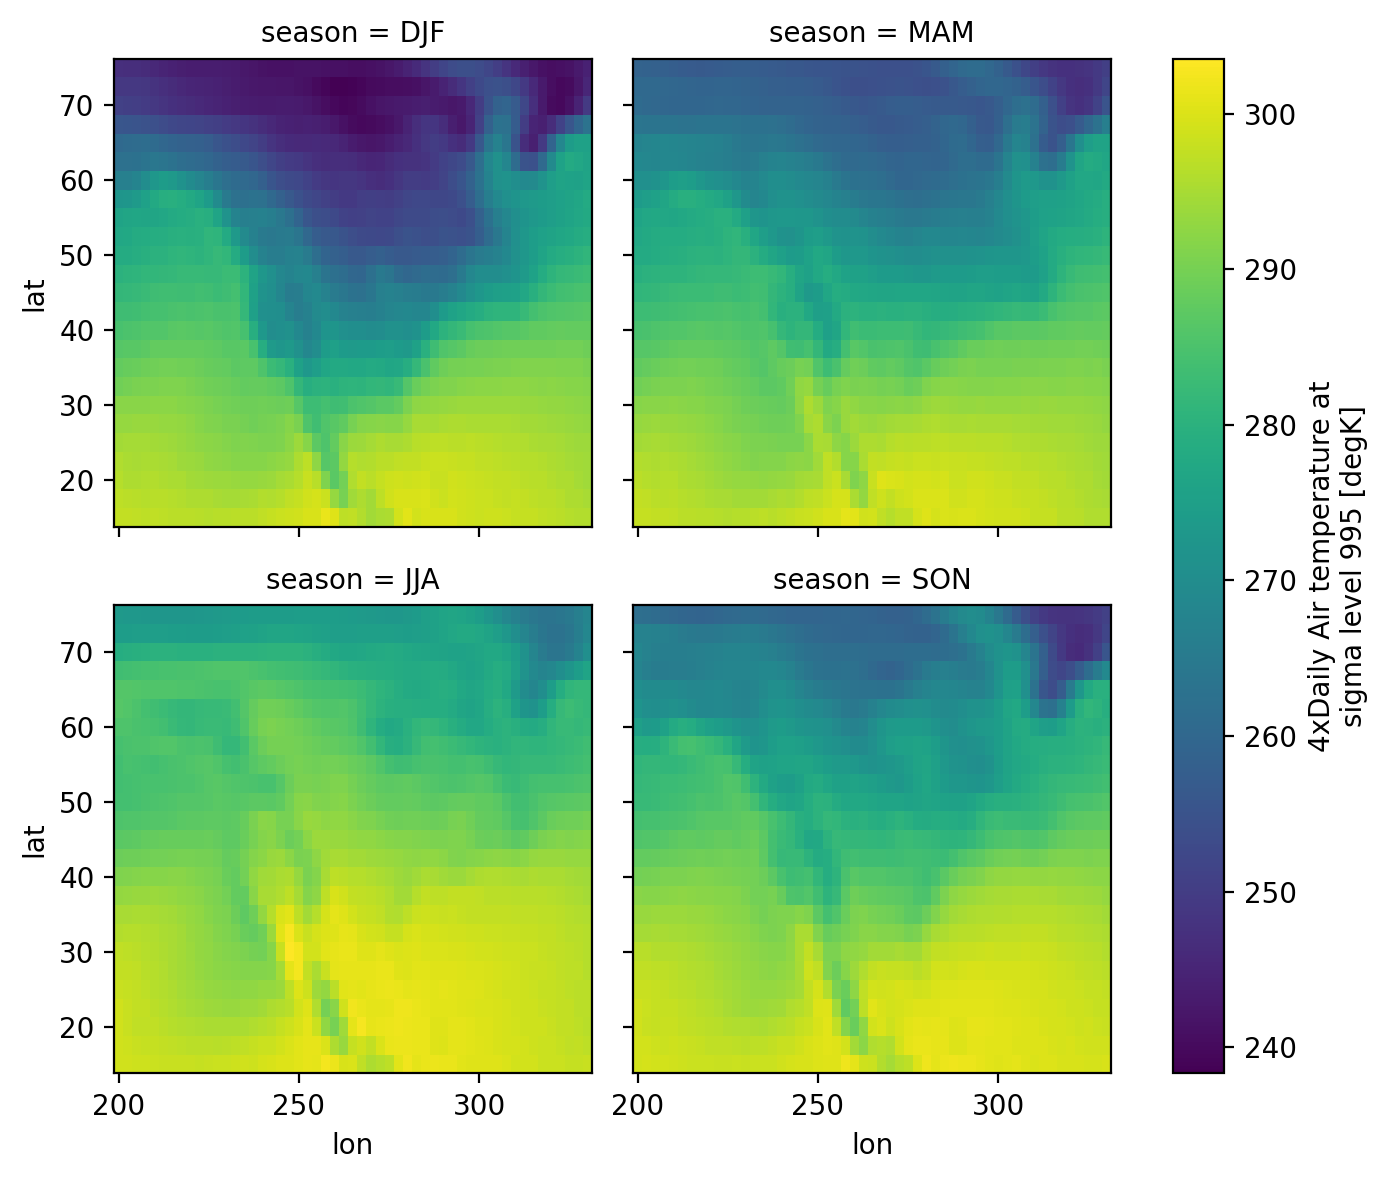

In [70]:
seasonal_mean.air.plot(col="season", col_wrap=2)

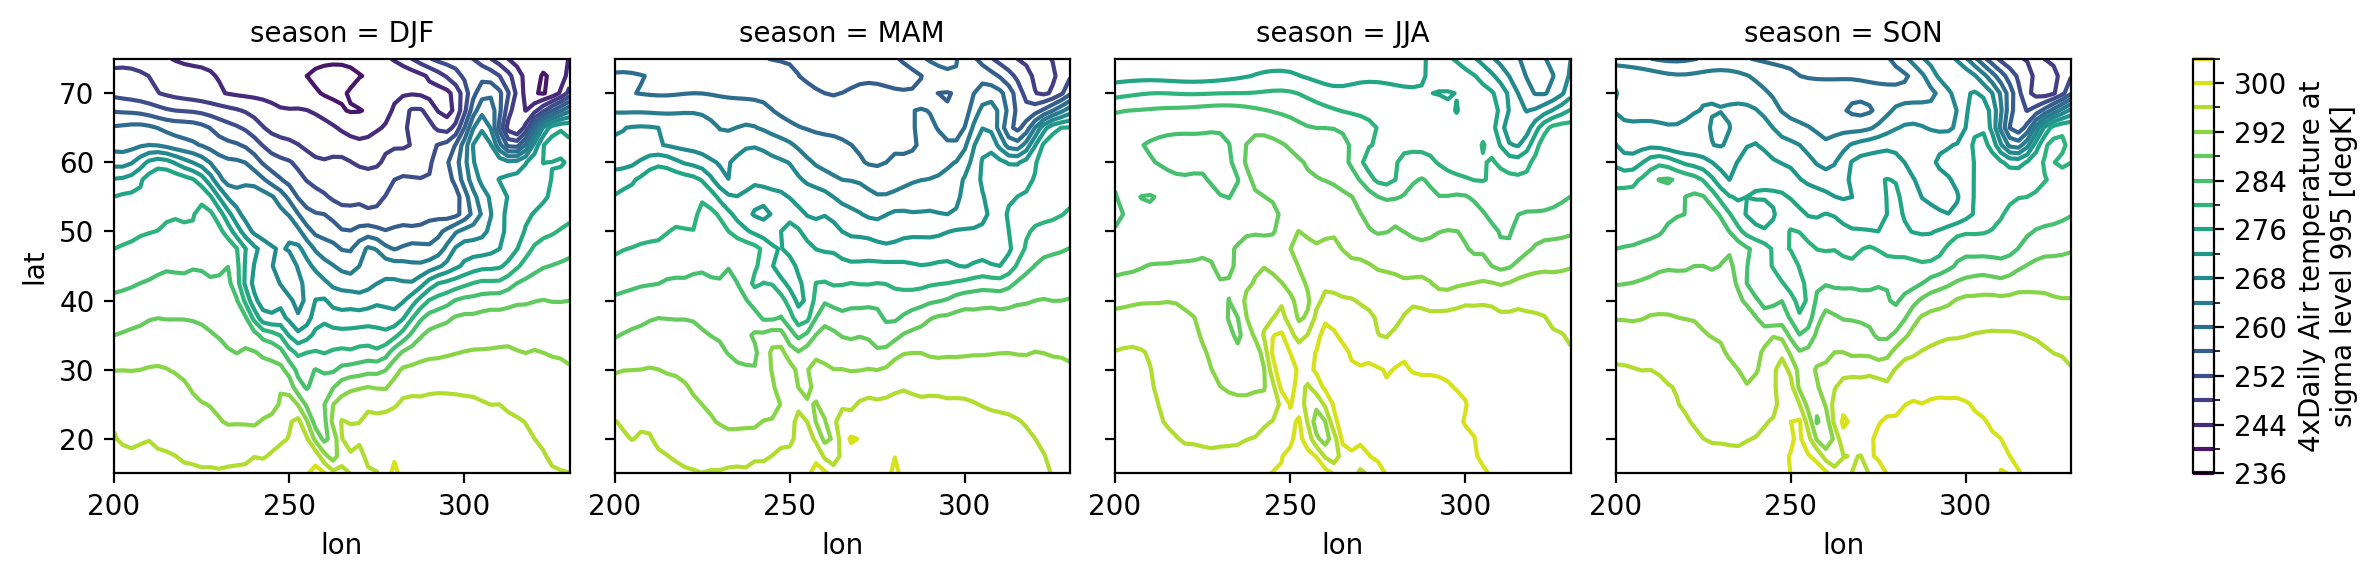

In [71]:
# contours n.轮廓（contour 的复数）；[气象]等高线
seasonal_mean.air.plot.contour(col="season", levels=20, add_colorbar=True)

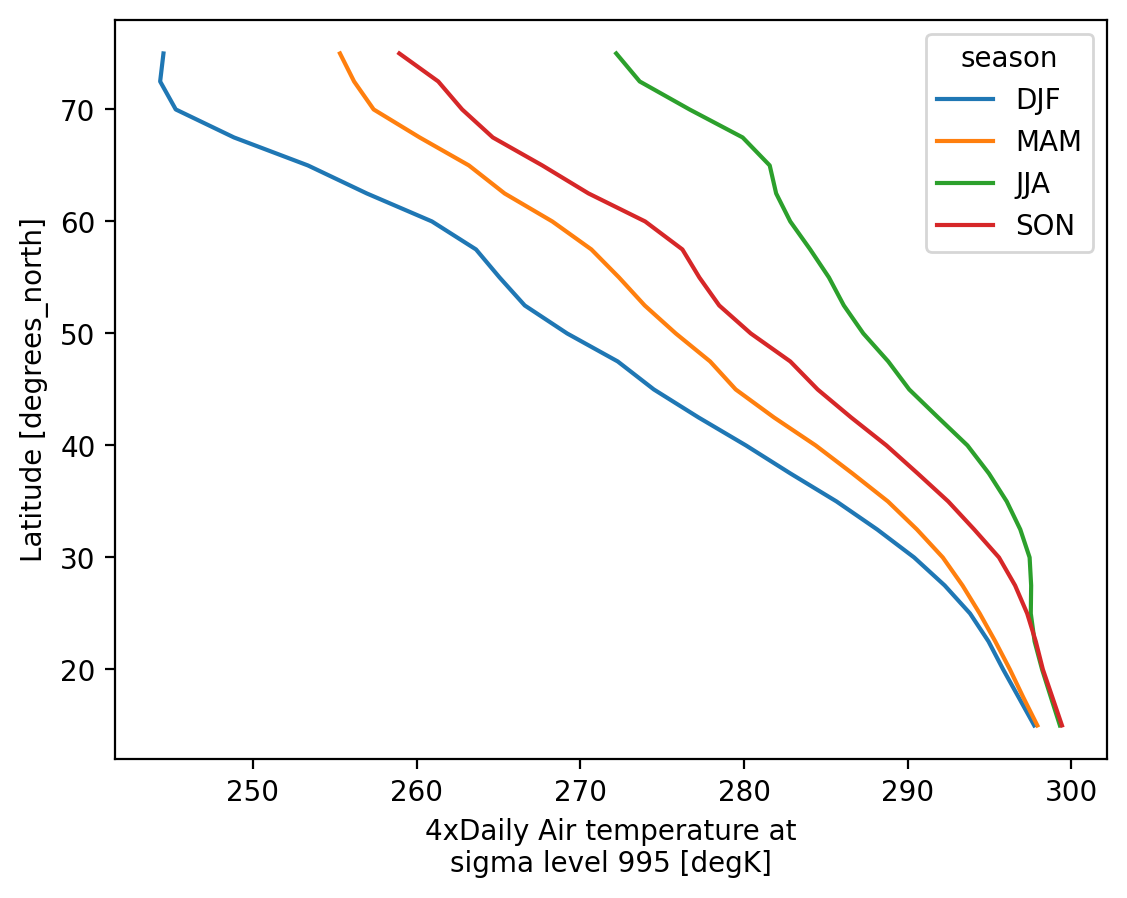

In [72]:
# line plots
seasonal_mean.air.mean("lon").plot.line(hue="season", y="lat")

In [73]:
# Reading and writing files
ds.to_netcdf("my-example-dataset.nc")

/tmp/ipykernel_167858/758489163.py:2: SerializationWarning: saving variable air with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds.to_netcdf("my-example-dataset.nc")
